In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
import matplotlib.pyplot as plt

In [2]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split

In [3]:
real=pd.read_csv('True.csv')
fake=pd.read_csv('Fake.csv')

In [4]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
real['Target']=1
fake['Target']=0

In [7]:
real.head()

,title,text,subject,date,Target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [8]:
news=pd.concat([real,fake])

In [9]:
news.isnull().sum()

title      0
text       0
subject    0
date       0
Target     0
dtype: int64

In [10]:
news['Target'].value_counts()

0    23481
1    21417
Name: Target, dtype: int64

In [11]:
news["is_duplicate"] = news.duplicated()
news[news["is_duplicate"]==True].count() 

title           209
text            209
subject         209
date            209
Target          209
is_duplicate    209
dtype: int64

In [12]:
news[news["is_duplicate"]==True]

,title,text,subject,date,Target,is_duplicate
445,Senate tax bill stalls on deficit-focused 'tri...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,"November 30, 2017",1,True
778,Trump warns 'rogue regime' North Korea of grav...,BEIJING (Reuters) - U.S. President Donald Trum...,politicsNews,"November 8, 2017",1,True
892,"Republicans unveil tax cut bill, but the hard ...",WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"November 2, 2017",1,True
896,Trump taps Fed centrist Powell to lead U.S. ce...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"November 2, 2017",1,True
974,"Two ex-Trump aides charged in Russia probe, th...",WASHINGTON (Reuters) - Federal investigators p...,politicsNews,"October 30, 2017",1,True
...,...,...,...,...,...,...
21353,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,"August 25, 2017",1,True
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1,True
9942,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017",0,True
11446,FORMER DEMOCRAT WARNS Young Americans: “Rioter...,"Who is silencing political speech, physically...",politics,"Mar 10, 2017",0,True


In [13]:
news.drop_duplicates(keep=False, inplace=True, ignore_index=True)
news.drop("is_duplicate", axis=1, inplace=True) 

In [14]:
news.shape

(44881, 5)

In [15]:
subject_count=news['subject'].value_counts()
subjects=news['subject'].unique()

In [16]:
print(subject_count)

politicsNews       11255
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64


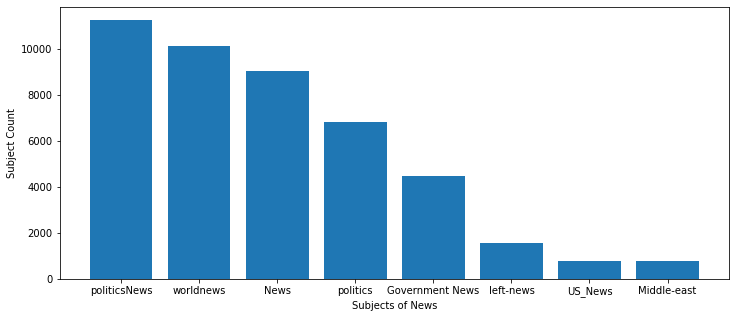

In [17]:
plt.figure(figsize=(12,5))
plt.bar(subjects,subject_count)
plt.xlabel("Subjects of News")
plt.ylabel("Subject Count")
plt.show()

In [18]:
real_subject_count=real['subject'].value_counts()
real_subject=real['subject'].unique()

In [19]:
print(real_subject_count)

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64


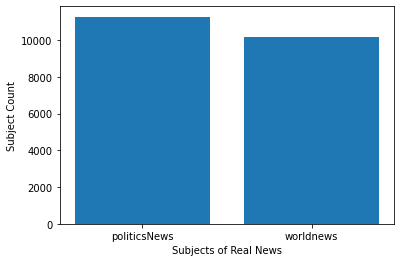

In [20]:
plt.bar(real_subject,real_subject_count)
plt.xlabel("Subjects of Real News")
plt.ylabel("Subject Count")
plt.show()

In [21]:
fake_subject_count=fake['subject'].value_counts()
fake_subject=fake['subject'].unique()

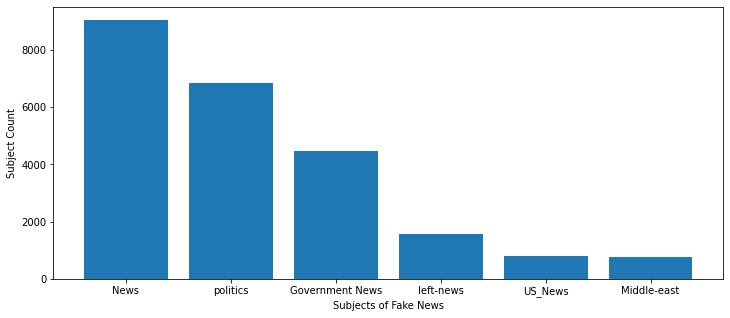

In [22]:
plt.figure(figsize=(12,5))
plt.bar(fake_subject,fake_subject_count)
plt.xlabel("Subjects of Fake News")
plt.ylabel("Subject Count")
plt.show()

In [23]:
news['text_length'] = news['text'].apply(len)

In [24]:
news['title_length'] = news['title'].apply(len)

In [25]:
news

,title,text,subject,date,Target,text_length,title_length
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,4659,64
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,4077,64
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,2789,60
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,2461,59
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,5204,69
...,...,...,...,...,...,...,...
44876,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0,3237,61
44877,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0,1684,81
44878,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0,25065,85
44879,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0,2685,67


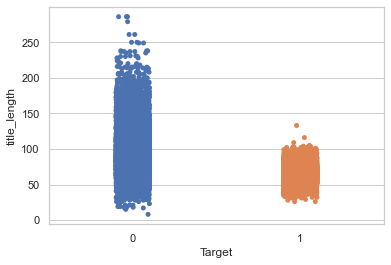

In [26]:
sns.set(style="whitegrid")
ax = sns.stripplot(x='Target', y='title_length', data=news)
plt.show()

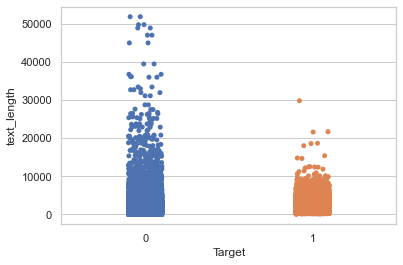

In [27]:
sns.set(style="whitegrid")
ax = sns.stripplot(x='Target', y='text_length', data=news)
plt.show()

<AxesSubplot:xlabel='Target', ylabel='text_length'>

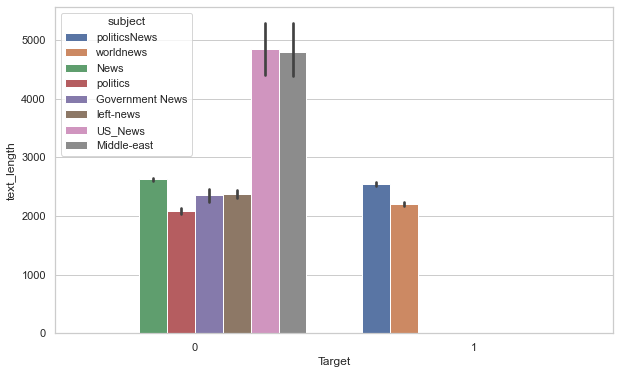

In [28]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Target', y = 'text_length', data = news, hue = 'subject')

<AxesSubplot:xlabel='Target', ylabel='title_length'>

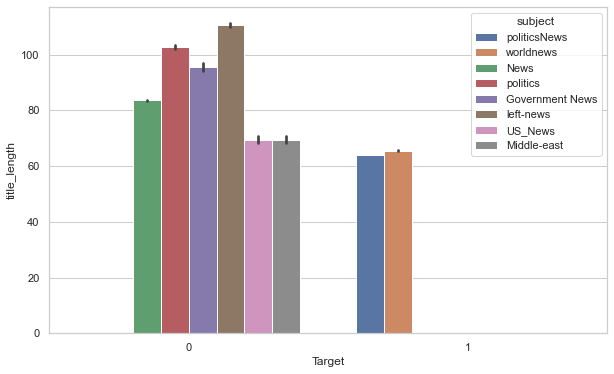

In [29]:
plt.figure(figsize = (10,6))

sns.barplot(x = 'Target', y = 'title_length', data = news, hue = 'subject')

In [30]:
news.groupby('Target').mean()

,text_length,title_length
Target,,
0,2547.396235,94.198032
1,2383.221075,64.660935


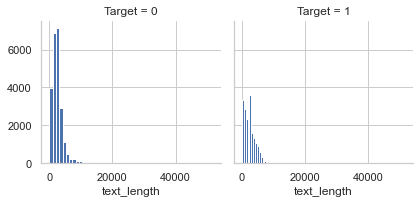

In [31]:
g = sns.FacetGrid(data = news, col = 'Target')
plt.ylabel("text_length")
g.map(plt.hist, 'Number of titile', bins = 50)

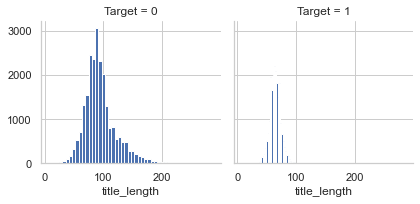

In [32]:
g = sns.FacetGrid(data = news, col = 'Target')
g.map(plt.hist, 'title_length', bins = 50)

In [33]:
news=news.sample(frac=1).reset_index(drop=True)

In [34]:
news

,title,text,subject,date,Target,text_length,title_length
0,This Expert Just Shut Down Every Claim That T...,There should be no doubt that racism is very m...,News,"May 29, 2016",0,2130,74
1,Goldman-run funds most popular with Republican...,NEW YORK (Reuters) - Presidential hopeful Ted ...,politicsNews,"January 21, 2016",1,6945,75
2,Trump F*cks Himself By Admitting Russia Inter...,"For months, Donald Trump has denied that Russi...",News,"June 24, 2017",0,3848,86
3,"Megyn Kelly Drops The Hammer On Roger Ailes, ...",The era of Roger Ailes at Fox News is definite...,News,"July 19, 2016",0,2889,88
4,DEAR KIDS: Socialism Is Not Cool…Socialism Kil...,This video should be viewed by every middle sc...,politics,"Mar 18, 2016",0,251,56
...,...,...,...,...,...,...,...
44876,THE DEEP STATE SPEAKS: Clapper and Brennan Thr...,Nice threat to POTUS: The intelligence commun...,left-news,"Jul 24, 2017",0,2321,103
44877,BREAKING BOMBSHELL: State Department Busted In...,They knew! Can you believe these people? FOX N...,politics,"Jan 7, 2016",0,3385,82
44878,COMEDY GOLD! NANCY PELOSI Talks Clinton And Tr...,,politics,"Oct 16, 2016",0,1,79
44879,NSA – ‘Top Secret’ Arsenal Released In Protest...,21st Century Wire says Out of all the intellig...,US_News,"April 9, 2017",0,8116,66


### --------------------------------------------------------------------------------------------------------------------------------------------------------------

In [35]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [36]:
input_arr=np.array(news['title'])

In [37]:
corpus = []

for i in range(0, 1000):
    newArr = re.sub('[^a-zA-Z]', ' ', input_arr[i])   
    newArr = newArr.lower()
    newArr = newArr.split()
    ps = PorterStemmer()
    newArr = [ps.stem(word) for word in newArr if not word in set(stopwords.words('english'))]
    newArr = ' '.join(newArr)
    corpus.append(newArr)

###  A function for model implementation and classification report

In [38]:
def Algo_implement(x_tr,x_te,y_tr,y_te,model):
    model.fit(x_tr,y_tr)
    y_pred=model.predict(x_te)
    report=classification_report(y_te,y_pred)
    print(report)
    prec = precision_score(y_te, y_pred)
    print("Precision ",prec)
    rec = recall_score(y_te, y_pred)
    print("Recall ",rec)
    f1 = f1_score(y_te, y_pred)
    print("F1-Score ",f1)
    #disp = plot_precision_recall_curve(model, x_te, y_te)
    #disp.ax_.set_title('Precision-Recall curve')
    

In [39]:
X1 = news['title'].iloc[:1000]
Y = news['Target'].iloc[:1000]

# Applying TFIDF Vectorizer

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
tf=TfidfVectorizer(analyzer='word',stop_words= 'english')
X1=tf.fit_transform(corpus)
X1.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Splitting data

In [42]:
x_tr,x_te,y_tr,y_te=train_test_split(X1,Y,test_size=0.3)
x_tr=x_tr.toarray()
x_te=x_te.toarray()

In [43]:
def get_stacking():
    level0 = list()
    level0.append(('bayes', GaussianNB()))
    level0.append(('MLP', MLPClassifier()))
    level0.append(('AdaBoost', AdaBoostClassifier()))
    level0.append(('grad_boost', GradientBoostingClassifier()))
    
    level1 = LogisticRegression()
   
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=6)
    return model

### Ensemble Model

In [44]:
Algo_implement(x_tr,x_te,y_tr,y_te,get_stacking())

              precision    recall  f1-score   support

           0       0.92      0.85      0.89       163
           1       0.84      0.91      0.87       137

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300

Precision  0.8389261744966443
Recall  0.9124087591240876
F1-Score  0.8741258741258742


### Applying Naive Bayes

In [45]:
Algo_implement(x_tr,x_te,y_tr,y_te,MultinomialNB())

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       163
           1       0.81      0.89      0.85       137

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300

Precision  0.8133333333333334
Recall  0.8905109489051095
F1-Score  0.8501742160278746


### MLP Classifier

In [46]:
Algo_implement(x_tr,x_te,y_tr,y_te,MLPClassifier())

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       163
           1       0.80      0.92      0.86       137

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.87      0.86      0.86       300

Precision  0.802547770700637
Recall  0.9197080291970803
F1-Score  0.8571428571428571


### Gradient Boosting

In [47]:
Algo_implement(x_tr,x_te,y_tr,y_te,GradientBoostingClassifier())

              precision    recall  f1-score   support

           0       0.97      0.71      0.82       163
           1       0.74      0.98      0.84       137

    accuracy                           0.83       300
   macro avg       0.86      0.84      0.83       300
weighted avg       0.87      0.83      0.83       300

Precision  0.7403314917127072
Recall  0.9781021897810219
F1-Score  0.8427672955974843


### ADA Boost

In [48]:
Algo_implement(x_tr,x_te,y_tr,y_te, AdaBoostClassifier())

              precision    recall  f1-score   support

           0       0.88      0.74      0.81       163
           1       0.74      0.88      0.81       137

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.82      0.81      0.81       300

Precision  0.7423312883435583
Recall  0.8832116788321168
F1-Score  0.8066666666666666


### Applying Logistic Regression

In [49]:
Algo_implement(x_tr,x_te,y_tr,y_te,LogisticRegression())

              precision    recall  f1-score   support

           0       0.94      0.82      0.87       163
           1       0.81      0.93      0.87       137

    accuracy                           0.87       300
   macro avg       0.87      0.88      0.87       300
weighted avg       0.88      0.87      0.87       300

Precision  0.810126582278481
Recall  0.9343065693430657
F1-Score  0.8677966101694915


### Applying Decision Tree

In [50]:
Algo_implement(x_tr,x_te,y_tr,y_te,DecisionTreeClassifier(criterion='gini'))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79       163
           1       0.72      0.92      0.81       137

    accuracy                           0.80       300
   macro avg       0.82      0.81      0.80       300
weighted avg       0.82      0.80      0.80       300

Precision  0.72
Recall  0.9197080291970803
F1-Score  0.8076923076923076


### Applying KNN

In [51]:
Algo_implement(x_tr,x_te,y_tr,y_te,KNeighborsClassifier(n_neighbors=501))

              precision    recall  f1-score   support

           0       0.59      0.96      0.73       163
           1       0.81      0.21      0.34       137

    accuracy                           0.62       300
   macro avg       0.70      0.58      0.53       300
weighted avg       0.69      0.62      0.55       300

Precision  0.8055555555555556
Recall  0.2116788321167883
F1-Score  0.33526011560693636


C:\Users\Sparsh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Sparsh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Sparsh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be remove

Text(0.5, 1.0, 'Precision-Recall curve for Tfidf')

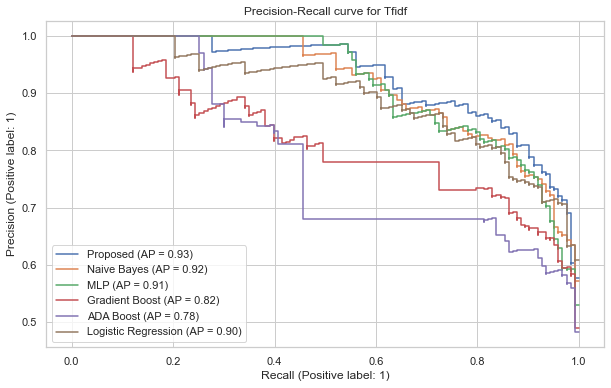

In [142]:
proposed=get_stacking()
proposed.fit(x_tr,y_tr)
nb=MultinomialNB()
nb.fit(x_tr,y_tr)
mlp=MLPClassifier()
mlp.fit(x_tr,y_tr)
gb=GradientBoostingClassifier()
gb.fit(x_tr,y_tr)
ada=AdaBoostClassifier()
ada.fit(x_tr,y_tr)
lr=LogisticRegression()
lr.fit(x_tr,y_tr)
dt=DecisionTreeClassifier(criterion='gini')
dt.fit(x_tr,y_tr)
knn=KNeighborsClassifier(n_neighbors=501)
knn.fit(x_tr,y_tr)

plt.figure(figsize = (10,6))
plot_precision_recall_curve(proposed, x_te, y_te, ax = plt.gca(),name = "Proposed")
plot_precision_recall_curve(nb, x_te, y_te, ax = plt.gca(),name = "Naive Bayes")
plot_precision_recall_curve(mlp, x_te, y_te, ax = plt.gca(),name = "MLP")
plot_precision_recall_curve(gb, x_te, y_te, ax = plt.gca(),name = "Gradient Boost")
plot_precision_recall_curve(ada, x_te, y_te, ax = plt.gca(),name = "ADA Boost")
plot_precision_recall_curve(lr, x_te, y_te, ax = plt.gca(),name = "Logistic Regression")
#plot_precision_recall_curve(dt, x_te, y_te, ax = plt.gca(),name = "Decision Tree")
#plot_precision_recall_curve(knn, x_te, y_te, ax = plt.gca(),name = "KNN")
plt.title('Precision-Recall curve for Tfidf')

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

C:\Users\Sparsh\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


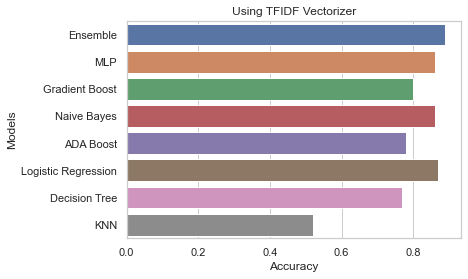

In [140]:
data={"Ensemble":0.89,"MLP":0.86,"Gradient Boost":0.80,"Naive Bayes":0.86,"ADA Boost":0.78,"Logistic Regression":0.87,"Decision Tree":0.77,"KNN":0.52}
techniques = list(data.keys())
accuracy = list(data.values())
sns.barplot(accuracy, techniques)
plt.title("Using TFIDF Vectorizer")
plt.xlabel("Accuracy")
plt.ylabel("Models")
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

plot_precision_recall_curve(ada, x_test, y_test, ax = plt.gca(),name = "AdaBoost")

plot_precision_recall_curve(ada_sm, x_test, y_test, ax = plt.gca(),name = "SMOTE")

plot_precision_recall_curve(ada_rus, x_test, y_test, ax = plt.gca(),name = "RUS")

plt.title('Precision-Recall curve')